In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

In [2]:
data_src = "../data/preprocessed/solar_data_combined_cleaned.csv"
data_df = pd.read_csv(data_src)
#print(data_df)

In [3]:
print(data_df.dtypes)
print(data_df.index)
print(data_df.shape)

datetime               object
local_datetime         object
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
Temperature           float64
Alpha                 float64
AOD                   float64
Asymmetry             float64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Dew Point             float64
DHI                     int64
DNI                     int64
GHI                     int64
Ozone                 float64
Relative Humidity     float64
Solar Zenith Angle    float64
SSA                   float64
Surface Albedo        float64
Pressure                int64
Precipitable Water    float64
Wind Direction          int64
Wind Speed            float64
Kcs                   float64
dtype: object
RangeIndex(start=0, stop=135556, step=1)
(135556, 28)


In [4]:
data_df['local_datetime'] = pd.to_datetime(data_df['local_datetime'])

In [5]:
num_lags = 6
for i in range(1, num_lags + 1):
    data_df[f'GHI_T_{i}'] = data_df['GHI'].shift(i)

In [6]:
for i in range(1, num_lags + 1):
    print(data_df[f'GHI_T_{i}'].head())

0      NaN
1    142.0
2    189.0
3    204.0
4    226.0
Name: GHI_T_1, dtype: float64
0      NaN
1      NaN
2    142.0
3    189.0
4    204.0
Name: GHI_T_2, dtype: float64
0      NaN
1      NaN
2      NaN
3    142.0
4    189.0
Name: GHI_T_3, dtype: float64
0      NaN
1      NaN
2      NaN
3      NaN
4    142.0
Name: GHI_T_4, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: GHI_T_5, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: GHI_T_6, dtype: float64


In [9]:
data_df.dropna(inplace=True)

In [10]:
data_df.set_index('local_datetime', inplace = True)

In [11]:
#data_df.drop(['datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute'], axis = 1, inplace = True)
data_df.drop(['datetime', 'Year'], axis = 1, inplace = True)

In [12]:
print(data_df.columns)
print(data_df.index)
print(data_df)

Index(['Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Alpha', 'AOD',
       'Asymmetry', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Dew Point', 'DHI', 'DNI', 'GHI', 'Ozone', 'Relative Humidity',
       'Solar Zenith Angle', 'SSA', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Kcs', 'GHI_T_1',
       'GHI_T_2', 'GHI_T_3', 'GHI_T_4', 'GHI_T_5', 'GHI_T_6'],
      dtype='object')
DatetimeIndex(['2018-01-01 10:30:00', '2018-01-01 10:40:00',
               '2018-01-01 10:50:00', '2018-01-01 11:00:00',
               '2018-01-01 11:10:00', '2018-01-01 11:20:00',
               '2018-01-01 11:30:00', '2018-01-01 11:40:00',
               '2018-01-01 11:50:00', '2018-01-01 12:00:00',
               ...
               '2023-12-31 14:10:00', '2023-12-31 14:20:00',
               '2023-12-31 14:30:00', '2023-12-31 14:40:00',
               '2023-12-31 14:50:00', '2023-12-31 15:00:00',
               '2023-12-31 15:10:00', '2023-12-31 15

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_df_ghi = data_df['GHI']
data_df.drop(['GHI'], axis = 1, inplace = True)
data_df_scaled = scaler.fit_transform(data_df)
data_df_scaled = pd.DataFrame(data_df_scaled, columns=data_df.columns)
print(data_df_scaled)

        Month  Day      Hour  Minute  Temperature     Alpha       AOD  \
0         0.0  0.0  0.739130     0.6     0.364250  0.465686  0.007002   
1         0.0  0.0  0.739130     0.8     0.370995  0.470588  0.005092   
2         0.0  0.0  0.739130     1.0     0.377740  0.470588  0.005092   
3         0.0  0.0  0.782609     0.0     0.384486  0.470588  0.005092   
4         0.0  0.0  0.782609     0.2     0.389545  0.470588  0.005092   
...       ...  ...       ...     ...          ...       ...       ...   
135545    1.0  1.0  0.956522     0.0     0.392917  0.441176  0.012094   
135546    1.0  1.0  0.956522     0.2     0.387858  0.441176  0.012094   
135547    1.0  1.0  0.956522     0.4     0.382799  0.441176  0.012094   
135548    1.0  1.0  0.956522     0.6     0.377740  0.441176  0.012094   
135549    1.0  1.0  0.956522     0.8     0.370995  0.431373  0.012094   

        Asymmetry  Clearsky DHI  Clearsky DNI  ...  Precipitable Water  \
0             0.5      0.090476      0.867816  ..

In [14]:
train_size = int(len(data_df) * 0.7)
X_train_df = data_df_scaled.iloc[:train_size]  # First 70%
Y_train_df = data_df_ghi.iloc[:train_size]

X_test_df = data_df_scaled.iloc[train_size:] # Last 30%
Y_test_df = data_df_ghi.iloc[train_size:]

In [15]:
print ('Number of observations in the Training set:', len(X_train_df))
print ('Percentage of data in Training set:', len(X_train_df)/len(data_df)*100)
print ('Number of observations in the Test set: ', len(X_test_df))
print ('Percentage of data in Test set:', len(X_test_df)/len(data_df)*100)

Number of observations in the Training set: 94885
Percentage of data in Training set: 70.0
Number of observations in the Test set:  40665
Percentage of data in Test set: 30.0


# Linear Regression As Benchmark Model

In [16]:
def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true)) * 100

In [17]:
from time import time
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model.fit(X_train_df, Y_train_df) #Fit object to training set
end = time()
Y_pred=benchmark_model.predict(X_test_df)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model.score(X_train_df, Y_train_df) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model.score(X_test_df, Y_test_df) * 100))

print("RMSE : {:.3f}".format(np.sqrt(np.mean((Y_test_df - Y_pred)**2))))
mae = mean_absolute_error(Y_test_df, Y_pred)
print('MAE: %f' % mae)
mape=MAPError(Y_test_df, Y_pred)
print('MAPE: %f' % mape)

Classifier fitted in 0.39 seconds
Score on Training data : 96.71%
Score on Testing data : 96.45%
RMSE : 52.958
MAE: 36.335172
MAPE: 50.071469


In [18]:
pd.DataFrame(benchmark_model.coef_,X_train_df.columns,columns=['Coeff'])

,Coeff
Month,-2.824292
Day,1.365472
Hour,-24.636469
Minute,0.291859
Temperature,153.621190
Alpha,15.951853
AOD,185.676580
Asymmetry,-0.530627
Clearsky DHI,-50.909788
Clearsky DNI,121.171299


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

if __name__ == "__main__":
    
    lr = LinearRegression()
    rfe = RFE(estimator=lr, n_features_to_select=10)  
    fit = rfe.fit(X_train_df, Y_train_df)
    print("Features: {features}".format(features=X_train_df.columns))
    print("Num Features: {number_features}".format(number_features=fit.n_features_))
    print("Selected Features: {support}".format(support=fit.support_))
    print("Feature Ranking: {ranking}".format(ranking=fit.ranking_))

    selected_columns = [column for column, selected in zip(X_train_df.columns, fit.support_) if selected]
    print("Selected columns: {selected}".format(selected = selected_columns))

Features: Index(['Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Alpha', 'AOD',
       'Asymmetry', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Dew Point', 'DHI', 'DNI', 'Ozone', 'Relative Humidity',
       'Solar Zenith Angle', 'SSA', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Kcs', 'GHI_T_1',
       'GHI_T_2', 'GHI_T_3', 'GHI_T_4', 'GHI_T_5', 'GHI_T_6'],
      dtype='object')
Num Features: 10
Selected Features: [False False False False  True False  True False  True  True  True  True
 False False False  True  True False False False False False False  True
  True False False False False False]
Feature Ranking: [15 18  7 21  1  9  1 20  1  1  1  1  6  3 14  1  1  2 13 12  8 19 17  1
  1  4 11 10 16  5]
Selected columns: ['Temperature', 'AOD', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'Relative Humidity', 'Solar Zenith Angle', 'Kcs', 'GHI_T_1']


# Machine Learning Models

    Ridge Regression
    k-Nearest Neighbors
    Random Forest Regressor
    GradientBoostingRegresso
    ExtraTreesRegressor
    Neural Network

In [20]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train_df, Y_train_df, X_test_df, Y_test_df, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train_df, Y_train_df)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train_df, Y_train_df)
    reg_props["test_score"] = regressor.score(X_test_df, Y_test_df)
    reg_props["rmse"] = np.sqrt(mean_squared_error(Y_test_df, regressor.predict(X_test_df)))
    reg_props["MAE"] = mean_absolute_error(Y_test_df, regressor.predict(X_test_df))
    reg_props["MAPE"] = MAPError(Y_test_df, regressor.predict(X_test_df))
    
    return reg_props

In [21]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        (Ridge, {"alpha": 0.8}),
        (KNeighborsRegressor, {"n_neighbors": 5, "weights": "uniform", "metric": "euclidean"}),
        (RandomForestRegressor, {"n_estimators": 125, "max_depth": 100, "min_samples_split": 4, "min_samples_leaf": 4}),
        (GradientBoostingRegressor, {"n_estimators": 125, "max_depth": 75, "min_samples_split": 4, "min_samples_leaf": 4}),
        (MLPRegressor, {"activation": "relu", "solver": "adam", "batch_size": 150, "max_iter": 300, "learning_rate_init": 0.005}),
        (ExtraTreesRegressor, {"n_estimators": 125, "max_depth": 100, "min_samples_split": 4, "min_samples_leaf": 4})
    ]
    
    print("Executing pipeline for multiple regressors...\n")
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg, params in regressors:
        print(f"Running model: {reg.__name__}")
        properties = pipeline(reg, X_train_df, Y_train_df, X_test_df, Y_test_df, **params)
        props.append(properties)
        
    print("\nPipeline execution completed.")
        
    return props

In [22]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def sample_execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
            ]
    
    print("Executing pipeline for multiple regressors...\n")
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg, params in regressors:
        print(f"Running model: {reg.__name__}")
        properties = pipeline(reg, X_train_df, Y_train_df, X_test_df, Y_test_df, **params)
        props.append(properties)
        
    print("\nPipeline execution completed.")
        
    return props

In [23]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    #properties = sample_execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    mae_vals = [prop["MAE"] for prop in properties]
    mape_vals=[prop["MAPE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals,
                            "MAE":mae_vals,
                            "MAPE":mape_vals
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()


Executing pipeline for multiple regressors...

Running model: Ridge
Running model: KNeighborsRegressor
Running model: RandomForestRegressor
Running model: GradientBoostingRegressor
Running model: MLPRegressor
Running model: ExtraTreesRegressor

Pipeline execution completed.


In [24]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(Y_test_df, benchmark_model.predict(X_test_df))),
        "MAE": mean_absolute_error(Y_test_df, benchmark_model.predict(X_test_df)),
        "MAPE": MAPError(Y_test_df, benchmark_model.predict(X_test_df)),
        "Training Scores": benchmark_model.score(X_train_df, Y_train_df),
        "Testing Scores" :benchmark_model.score(X_test_df, Y_test_df),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

In [25]:
properties

,Training Times,Training Scores,Testing Scores,RMSE,MAE,MAPE
Ridge,0.0375121,0.967128,0.964459,52.9582,36.3501,50.0218
KNeighborsRegressor,0.00230503,0.989204,0.984243,35.2624,23.1772,17.0707
RandomForestRegressor,193.294,0.999852,0.999716,4.73269,1.26435,0.416613
GradientBoostingRegressor,723.681,1,0.999748,4.45684,1.42055,0.445479
MLPRegressor,175.135,0.999937,0.999934,2.27623,1.54655,0.959985
ExtraTreesRegressor,50.3876,0.999896,0.999806,3.90987,1.48758,0.547745
Linear Regression (Benchmark),0.394009,0.967129,0.96446,52.9578,36.3352,50.0715


# Performance Of Models

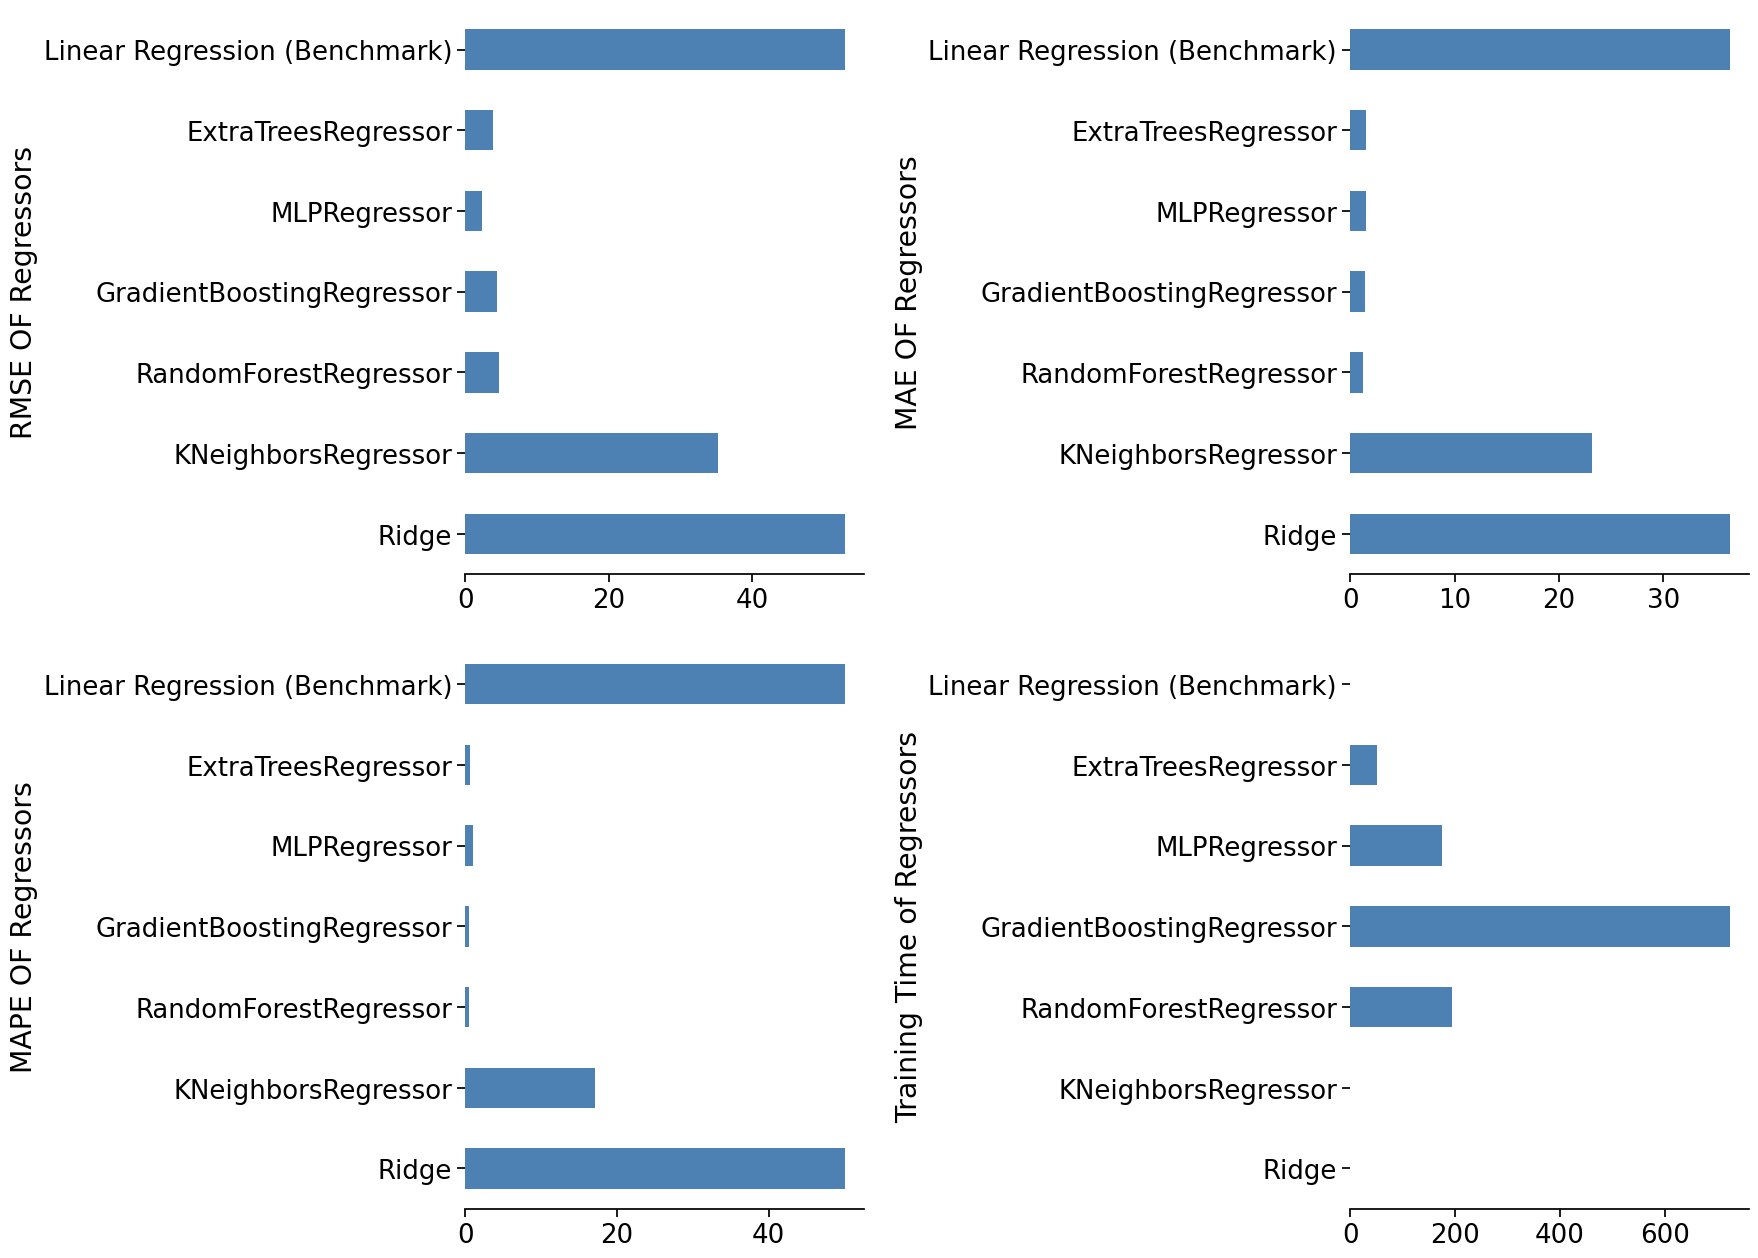

In [26]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("MAPE OF Regressors")
properties["MAPE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

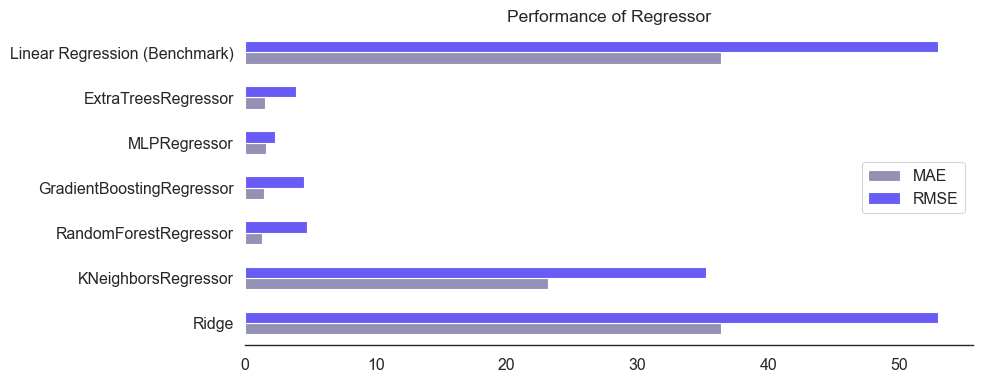

In [27]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  

ax= properties[["MAE", "RMSE"]].plot(kind="barh", color=['#9491B5', '#685CF4'], title="Performance of Regressor", figsize=(10, 4))
sns.despine(left=True);
plt.tight_layout() 

plt.show()

# Hyper Parameter Tuning Of Extra Trees Regressor

A Meta Estimator that fits a number of randomized decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

    No of Trees
    No of Features to Consider
    Max Depth of Tree


In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor()

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 75, 100, 150],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [50, 100,150, 200, 250]
}

# Use Randomized search to try 10 subsets from parameter space with 3-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=10, scoring="neg_mean_squared_error", cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_df, Y_train_df)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .max_depth=200, max_features=log2, n_estimators=100; total time=  43.7s
[CV] END .max_depth=100, max_features=sqrt, n_estimators=150; total time= 1.7min
[CV] END .max_depth=200, max_features=auto, n_estimators=100; total time= 1.4min


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [50, 100, 150, 200, 250],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 75, 100, 150]},
                   scoring='neg_mean_squared_error', verbose=2)

In [29]:
#Display Best Params
print("Parameters of Best Regressor : {}".format(grid_search.best_params_))

Parameters of Best Regressor : {'n_estimators': 150, 'max_features': 'auto', 'max_depth': 250}


In [30]:
best_model = grid_search.best_estimator_
print('Mean Absolute Error:', mean_absolute_error(Y_test_df, best_model.predict(X_test_df)))
print('Mean Squared Error:',np.sqrt(mean_squared_error(Y_test_df, best_model.predict(X_test_df))))
print('Mean Absolute Percentage Error:',MAPError(Y_test_df, best_model.predict(X_test_df)))

Mean Absolute Error: 1.1313734169433143
Mean Squared Error: 3.032441019242727
Mean Absolute Percentage Error: 0.3850860916263121


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = ExtraTreesRegressor()

param_grid = {
    "n_estimators": [10, 50, 75, 100, 150],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [50, 100,150, 200, 250]
}


gs_cv = GridSearchCV(clf, param_grid, scoring="neg_mean_squared_error", cv=3, n_jobs=-2, verbose = 2)
gs_cv.fit(X_train_df, Y_train_df)

# best hyperparameter setting
gs_cv.best_params_

#Display best params
print("Parameters Of Best Regressor : {}".format(gs_cv.best_params_))

In [ ]:
best_model = gs_cv.best_estimator_
print('Mean Absolute Error:', mean_absolute_error(Y_test_df, best_model.predict(X_test_df)))
print('Mean Squared Error:',np.sqrt(mean_squared_error(Y_test_df, best_model.predict(X_test_df))))
print('Mean Absolute Percentage Error:',MAPError(Y_test_df, best_model.predict(X_test_df)))

In [31]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train_df.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train_df.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

#print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
#for index in feature_indices[::-1][:5]:
    #print(X_train.columns[index])
    
#print("\nTop 5 least important features:-")
#for index in feature_indices[:5]:
    #print(X_train.columns[index])

Most important feature = GHI_T_1
Least important feature = Pressure
[CV] END ...max_depth=50, max_features=sqrt, n_estimators=50; total time=  21.6s
[CV] END .max_depth=100, max_features=sqrt, n_estimators=150; total time= 1.3min
[CV] END .max_depth=150, max_features=sqrt, n_estimators=150; total time= 1.2min


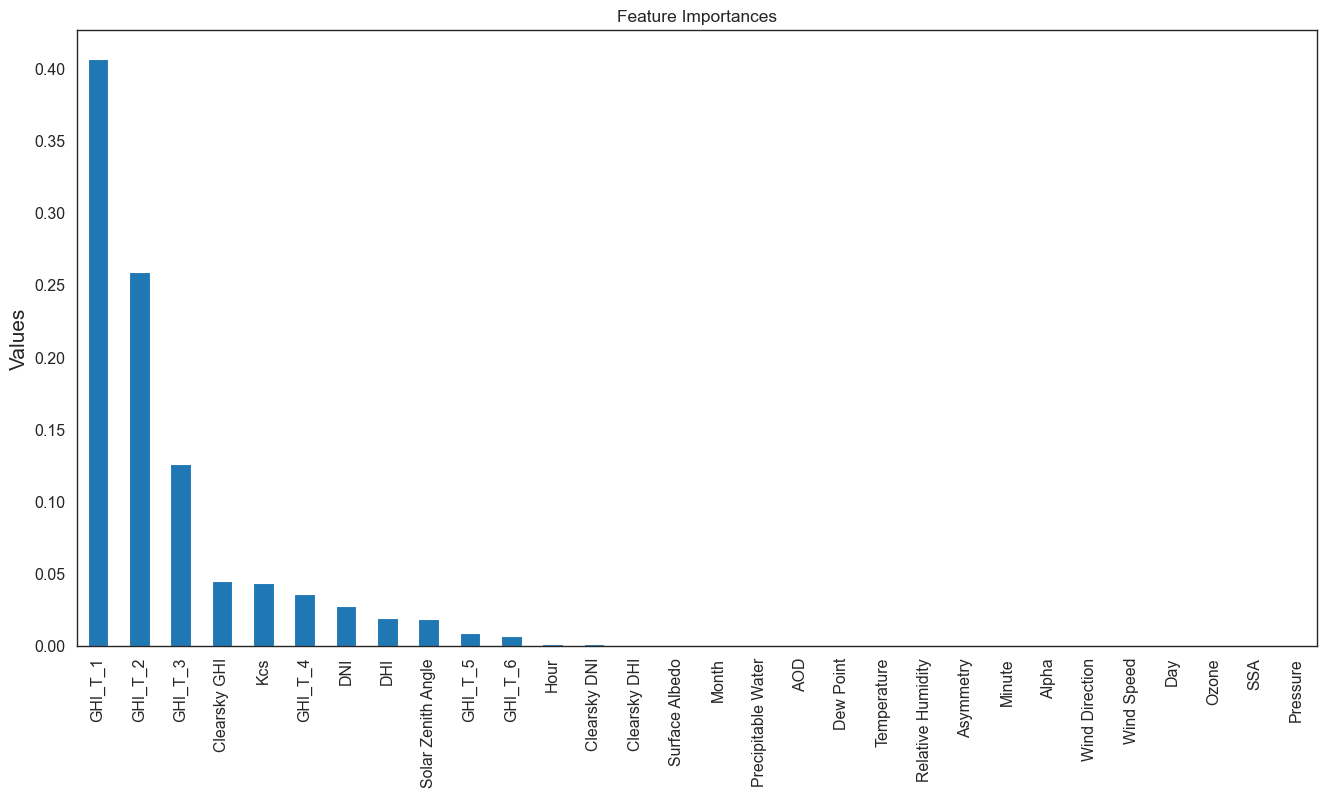

In [38]:
fi = pd.DataFrame(index=X_train_df.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False)
fi.head()
# Plot feature importance
fi = pd.DataFrame(index=X_train_df.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()